<a href="https://colab.research.google.com/github/klnsuman/MachineLearning/blob/master/customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Customer Churn Prediction

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
os.listdir()

['.config', 'drive', 'sample_data']

In [4]:
DATA_DIR="/content/drive/MyDrive/1.Kaggle-MyProjects/CustomerChurn/"
os.chdir(DATA_DIR)

In [5]:
os.listdir()


['WA_Fn-UseC_-Telco-Customer-Churn.csv']

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

## Convert Object to Numbers
# to_numeric converts to number , where ever possible.
# if there is space or number column , makes the field value Null

In [11]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [12]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()==True]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()==True].shape

(11, 20)

In [14]:
df1 = df[df.TotalCharges != ' ']
df1.shape

(7032, 20)

In [15]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [16]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [17]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([[ 847.,  476.,  402.,  424.,  371.,  346.,  380.,  425.,  455.,
         1037.],
        [ 877.,  259.,  159.,  114.,  102.,   98.,   72.,   70.,   46.,
           72.]]),
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <a list of 2 Lists of Patches objects>)

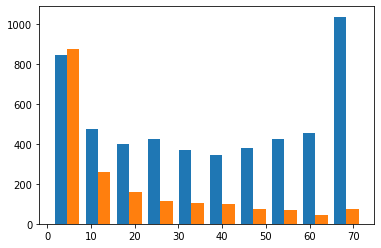

In [18]:
plt.hist([tenure_churn_no,tenure_churn_yes])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([[ 847.,  476.,  402.,  424.,  371.,  346.,  380.,  425.,  455.,
         1037.],
        [ 877.,  259.,  159.,  114.,  102.,   98.,   72.,   70.,   46.,
           72.]]),
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <a list of 2 Lists of Patches objects>)

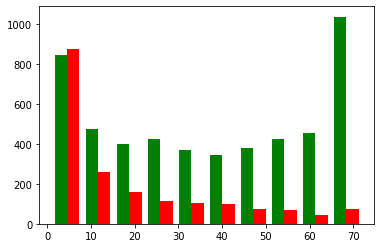

In [19]:
plt.hist([tenure_churn_no,tenure_churn_yes],color=['green','red'],label=['Churn=Yes','Churn=No'])

In [20]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [21]:
df1.shape,df.shape

((7032, 20), (7043, 20))

In [22]:
for col in df.columns:
  print(f'{col}=>{df[col].unique()}' )

gender=>['Female' 'Male']
SeniorCitizen=>[0 1]
Partner=>['Yes' 'No']
Dependents=>['No' 'Yes']
tenure=>[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService=>['No' 'Yes']
MultipleLines=>['No phone service' 'No' 'Yes']
InternetService=>['DSL' 'Fiber optic' 'No']
OnlineSecurity=>['No' 'Yes' 'No internet service']
OnlineBackup=>['Yes' 'No' 'No internet service']
DeviceProtection=>['No' 'Yes' 'No internet service']
TechSupport=>['No' 'Yes' 'No internet service']
StreamingTV=>['No' 'Yes' 'No internet service']
StreamingMovies=>['No' 'Yes' 'No internet service']
Contract=>['Month-to-month' 'One year' 'Two year']
PaperlessBilling=>['Yes' 'No']
PaymentMethod=>['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges=>[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalChar

In [23]:
df1.replace('No phone service','No',inplace=True)
df1.replace('No internet service','No',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [24]:
for col in df1.columns:
  print(f'{col}=>{df1[col].unique()}' )

gender=>['Female' 'Male']
SeniorCitizen=>[0 1]
Partner=>['Yes' 'No']
Dependents=>['No' 'Yes']
tenure=>[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService=>['No' 'Yes']
MultipleLines=>['No' 'Yes']
InternetService=>['DSL' 'Fiber optic' 'No']
OnlineSecurity=>['No' 'Yes']
OnlineBackup=>['Yes' 'No']
DeviceProtection=>['No' 'Yes']
TechSupport=>['No' 'Yes']
StreamingTV=>['No' 'Yes']
StreamingMovies=>['No' 'Yes']
Contract=>['Month-to-month' 'One year' 'Two year']
PaperlessBilling=>['Yes' 'No']
PaymentMethod=>['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges=>[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges=>[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn=>['No' 'Yes']


In [25]:
def print_unique_col_values(df_1):
  for col in df_1.columns:
    if df_1[col].dtypes == 'object':
      print(f'{col}=>{df_1[col].unique()}' )

In [26]:
print_unique_col_values(df1)

gender=>['Female' 'Male']
Partner=>['Yes' 'No']
Dependents=>['No' 'Yes']
PhoneService=>['No' 'Yes']
MultipleLines=>['No' 'Yes']
InternetService=>['DSL' 'Fiber optic' 'No']
OnlineSecurity=>['No' 'Yes']
OnlineBackup=>['Yes' 'No']
DeviceProtection=>['No' 'Yes']
TechSupport=>['No' 'Yes']
StreamingTV=>['No' 'Yes']
StreamingMovies=>['No' 'Yes']
Contract=>['Month-to-month' 'One year' 'Two year']
PaperlessBilling=>['Yes' 'No']
PaymentMethod=>['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn=>['No' 'Yes']


In [27]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
  df1[col].replace({'Yes':1,'No':0},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [28]:
print_unique_col_values(df1)

gender=>['Female' 'Male']
InternetService=>['DSL' 'Fiber optic' 'No']
Contract=>['Month-to-month' 'One year' 'Two year']
PaymentMethod=>['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [29]:
for col in df1.columns:
  print(f'{col}=>{df1[col].unique()}' )

gender=>['Female' 'Male']
SeniorCitizen=>[0 1]
Partner=>[1 0]
Dependents=>[0 1]
tenure=>[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService=>[0 1]
MultipleLines=>[0 1]
InternetService=>['DSL' 'Fiber optic' 'No']
OnlineSecurity=>[0 1]
OnlineBackup=>[1 0]
DeviceProtection=>[0 1]
TechSupport=>[0 1]
StreamingTV=>[0 1]
StreamingMovies=>[0 1]
Contract=>['Month-to-month' 'One year' 'Two year']
PaperlessBilling=>[1 0]
PaymentMethod=>['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges=>[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges=>[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn=>[0 1]


In [30]:
df1.gender.replace({'Female':1,'Male':0},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [31]:
df1.gender.unique()

array([1, 0])

In [32]:
pd.get_dummies(data=df1,columns=['InternetService'])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,1,0,1,0,0,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,0
1,0,0,0,0,34,1,0,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0,1,0,0
2,0,0,0,0,2,1,0,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0
3,0,0,0,0,45,0,0,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0
4,1,0,0,0,2,1,0,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0,1,0,0
7039,1,0,1,1,72,1,1,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0,0,1,0
7040,1,0,1,1,11,0,0,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0,1,0,0
7041,0,1,1,0,4,1,1,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1,0,1,0


In [33]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [34]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
63,1,0,1,1,18,1,0,0,0,1,1,0,0,1,54.4,957.10,0,1,0,0,0,1,0,0,1,0,0
2993,0,0,1,1,1,1,0,0,0,0,0,0,0,0,20.4,20.40,0,0,0,1,0,1,0,0,0,0,1
3223,0,0,1,0,3,0,0,0,1,0,0,0,0,0,29.8,94.40,0,1,0,0,1,0,0,0,1,0,0
4339,0,0,1,0,38,1,1,0,0,1,1,0,1,0,69.0,2669.45,0,1,0,0,0,1,0,0,1,0,0


In [35]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [36]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [37]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1264,0,0,1,1,0.957746,1,0,0,0,0,1,1,1,1,0.765672,0.767701,0,0,1,0,0,0,1,0,1,0,0
2196,1,0,1,1,0.253521,1,0,0,0,0,0,0,0,0,0.019403,0.041934,0,0,0,1,1,0,0,0,0,0,1
1730,0,0,0,0,0.000000,1,1,0,0,0,0,1,0,1,0.413930,0.004737,1,1,0,0,1,0,0,0,0,1,0


In [38]:
for col in df2:
  print(f'{col} {df2[col].unique()}')

gender [1 0]
SeniorCitizen [0 1]
Partner [1 0]
Dependents [0 1]
tenure [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService [0 1]
MultipleLines [0 1]
OnlineSecurity [0 1]
OnlineBackup [1 0]
DeviceProtection [0 1]
TechSupport [0 1]
Stream

In [39]:
for col in df2:
  print(f'{col} {df2[col].unique()}')

gender [1 0]
SeniorCitizen [0 1]
Partner [1 0]
Dependents [0 1]
tenure [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService [0 1]
MultipleLines [0 1]
OnlineSecurity [0 1]
OnlineBackup [1 0]
DeviceProtection [0 1]
TechSupport [0 1]
Stream

In [40]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [42]:
X_test.shape,X_train.shape,

((1407, 26), (5625, 26))

In [43]:
X_train[0:5]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,0,0,1,1,0.660199,0.097709,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,0,0,0,0,0.011940,0.000075,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,1,1,1,1,0.605473,0.639978,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.259204,0.008135,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,0,1,1,1,0.808458,0.685703,0,1,0,0,1,0,1,0,0,0


In [44]:
import tensorflow as tf
from tensorflow import keras

In [45]:
X_train.shape

(5625, 26)

In [47]:
model = keras.Sequential([
                          keras.layers.Dense(20,input_shape=(26,),activation='relu'),
                          keras.layers.Dense(1,activation='sigmoid'),
                          ])

model.compile(optimizer='adam' ,
              loss='binary_crossentropy',
              metrics='accuracy'
              )

model.fit(X_train,y_train,epochs=10)

Epoch 1/10
176/176 [==============================] - 2s 4ms/step - loss: 0.5165 - accuracy: 0.7456
Epoch 2/10
176/176 [==============================] - 1s 3ms/step - loss: 0.4306 - accuracy: 0.7959
Epoch 3/10
176/176 [==============================] - 1s 3ms/step - loss: 0.4196 - accuracy: 0.7998
Epoch 4/10
176/176 [==============================] - 1s 3ms/step - loss: 0.4152 - accuracy: 0.8023
Epoch 5/10
176/176 [==============================] - 1s 3ms/step - loss: 0.4137 - accuracy: 0.8052
Epoch 6/10
176/176 [==============================] - 1s 3ms/step - loss: 0.4119 - accuracy: 0.8041
Epoch 7/10
176/176 [==============================] - 1s 3ms/step - loss: 0.4105 - accuracy: 0.8052
Epoch 8/10
176/176 [==============================] - 1s 4ms/step - loss: 0.4097 - accuracy: 0.8071
Epoch 9/10
176/176 [==============================] - 0s 3ms/step - loss: 0.4077 - accuracy: 0.8068
Epoch 10/10
176/176 [==============================] - 0s 3ms/step - loss: 0.4070 - accuracy: 0.8103